In [14]:
import pandas as pd
import numpy as np
import missingno as msno
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import stats
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [248]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn import datasets
from sklearn import feature_selection
from sklearn.svm import LinearSVC
from sklearn import linear_model
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [249]:
# importation 
data = pd.read_csv('data/external_Microsoft_issueDataset.csv')

# create a dictionnary actionable for renaming necessary columns 
old_names = ['Access Level', 'BD877Training Completed', 'Department Code', 'Email Domain', 'EmployeeTargetedOverPastYear', 
             'Gender (code)','Social Media Activity (Scaled)','fraudTraining Completed']

new_names = ['Access_Level', 'Training_Completed', 'Code_postal','Email_Domain', 'EmployeeTargeted',
             'Gender','Social_Media','fraudTraining']

data.rename(columns=dict(zip(old_names, new_names)), inplace=True)
data.head(3)

,Access_Level,Training_Completed,Code_postal,Email_Domain,EmployeeTargeted,Gender,Social_Media,behaviorPattern2,fraudTraining,peerUsageMetric6,usageMetric2,usageMetric5
0,2,0.0,24999,ox.ac.uk,0.0,0,0.0,0,1,5,0,7
1,2,0.0,10000,ox.ac.uk,1.0,1,NaN,0,0,4,0,1
2,0,0.0,10000,si.edu,1.0,1,0.0,0,1,0,0,3


### I -  EXPLORATION

In [250]:
data.describe()
# problem of balanced class on EmployeeTargeted
# good repartition of Gender class
# missing data present 

,Access_Level,Training_Completed,Code_postal,EmployeeTargeted,Gender,Social_Media,behaviorPattern2,fraudTraining,peerUsageMetric6,usageMetric2,usageMetric5
count,14000.000000,13688.000000,14000.000000,14000.000000,14000.000000,13739.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000
mean,2.504143,0.499196,32413.862786,0.731643,0.498286,0.802679,0.904429,0.503286,2.987571,0.764786,3.471000
std,1.733468,0.500018,24471.894437,0.443120,0.500015,0.896202,0.953978,0.500007,2.003815,0.876161,2.280655
min,0.000000,0.000000,10000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,10000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,2.000000,0.000000,24999.000000,1.000000,0.000000,1.000000,1.000000,1.000000,3.000000,1.000000,3.000000
75%,4.000000,1.000000,39998.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,5.000000
max,7.000000,1.000000,84995.000000,1.000000,1.000000,7.000000,7.000000,1.000000,6.000000,7.000000,7.000000


In [251]:
pd.crosstab(data["EmployeeTargeted"]

1.0    0.731643
0.0    0.268357
Name: EmployeeTargeted, dtype: float64

In [167]:
data.info()
# no fake numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Access_Level        14000 non-null  int64  
 1   Training_Completed  13688 non-null  float64
 2   Code_postal         14000 non-null  int64  
 3   Email_Domain        13735 non-null  object 
 4   EmployeeTargeted    14000 non-null  float64
 5   Gender              14000 non-null  int64  
 6   Social_Media        13739 non-null  float64
 7   behaviorPattern2    14000 non-null  int64  
 8   fraudTraining       14000 non-null  int64  
 9   peerUsageMetric6    14000 non-null  int64  
 10  usageMetric2        14000 non-null  int64  
 11  usageMetric5        14000 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1.3+ MB


In [12]:
# missing data per columns
print(data.isnull().sum())

Access_Level            0
Training_Completed    312
Code_postal             0
Email_Domain          265
EmployeeTargeted        0
Gender                  0
Social_Media          261
behaviorPattern2        0
fraudTraining           0
peerUsageMetric6        0
usageMetric2            0
usageMetric5            0
dtype: int64


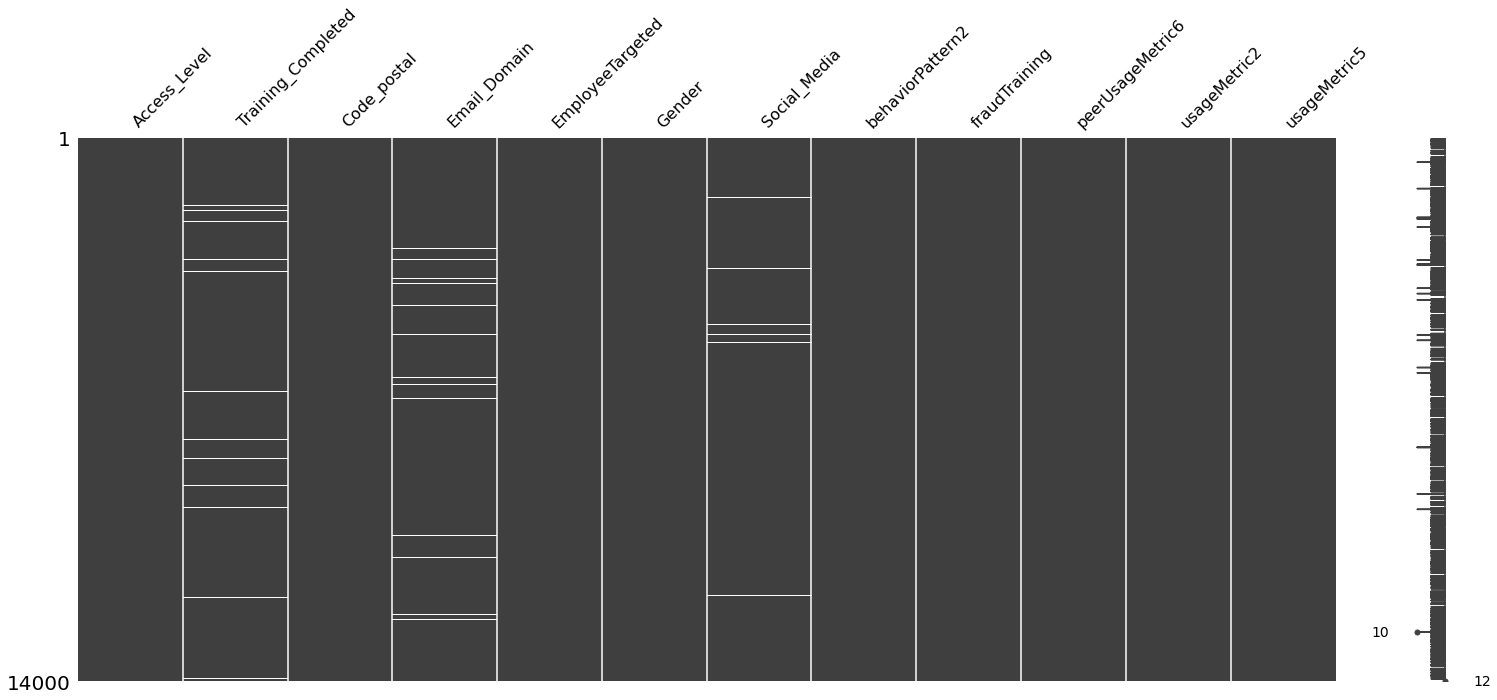

In [16]:
# missing data per rows
%matplotlib inline
msno.matrix(data)
# ==> as the missing data are not in the same rows, we can't remove them from the same 

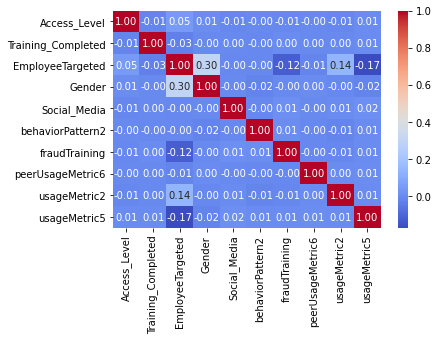

In [19]:
# correlation of the variables
sns.heatmap(data.drop(columns=['Code_postal']).corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')
# ==> globally weak correlation except for Gender, week autocorrelation between variables

<Figure size 720x432 with 0 Axes>

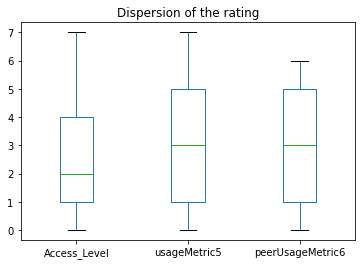

<Figure size 720x432 with 0 Axes>

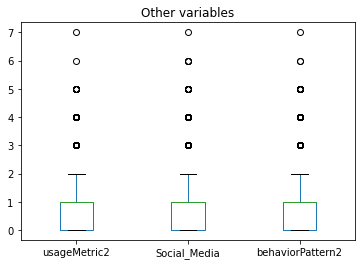

<Figure size 216x288 with 0 Axes>

In [34]:
plt.figure(figsize=(10, 6))
f = plt.figure(1)
df = pd.DataFrame(data = data.filter(['Access_Level'  , 'usageMetric5' , 'peerUsageMetric6']))
df.plot(kind='box')
plt.title("Dispersion of the rating")
plt.figure(figsize=(10, 6))
f.show()

g = plt.figure(2)
df = pd.DataFrame(data = data.filter(['usageMetric2', 'Social_Media', 'behaviorPattern2']))
df.plot(kind='box')
plt.title("Other variables")
plt.figure(figsize=(3,4))
g.show()
# deal with outlier in 'usageMetric2', 'Social_Media', 'behaviorPattern2'
# Same scale for all variables

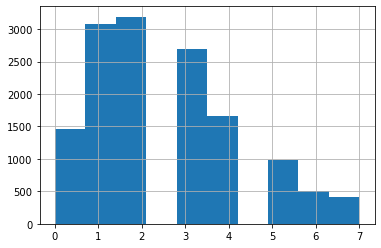

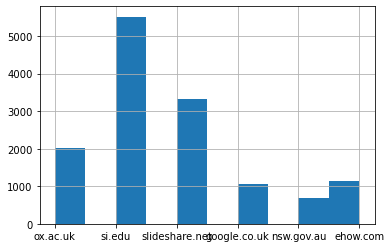

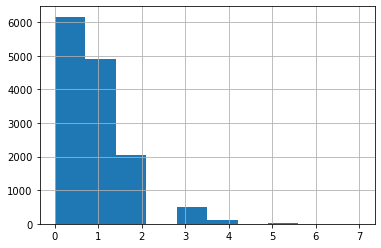

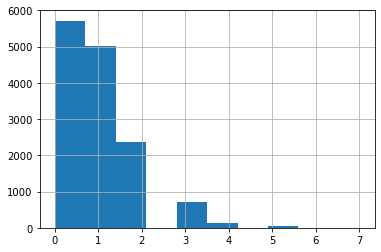

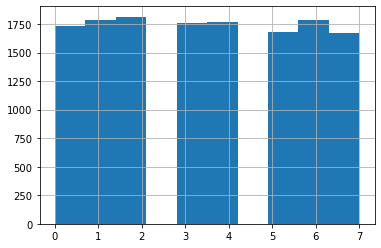

In [76]:
f = plt.figure(1)
data["Access_Level"].hist()
f.show()
# need to group Access_Level

f = plt.figure(2)
data["Email_Domain"].hist()
f.show()
# need to group category Email_Domain

f = plt.figure(3)
data["Social_Media"].hist()
f.show()
# need to group category Social_Media

f = plt.figure(4)
data["behaviorPattern2"].hist()
f.show()
# need to group category behaviorPattern2

f = plt.figure(5)
data["usageMetric5"].hist()
f.show()

# need to group category 5,6,7

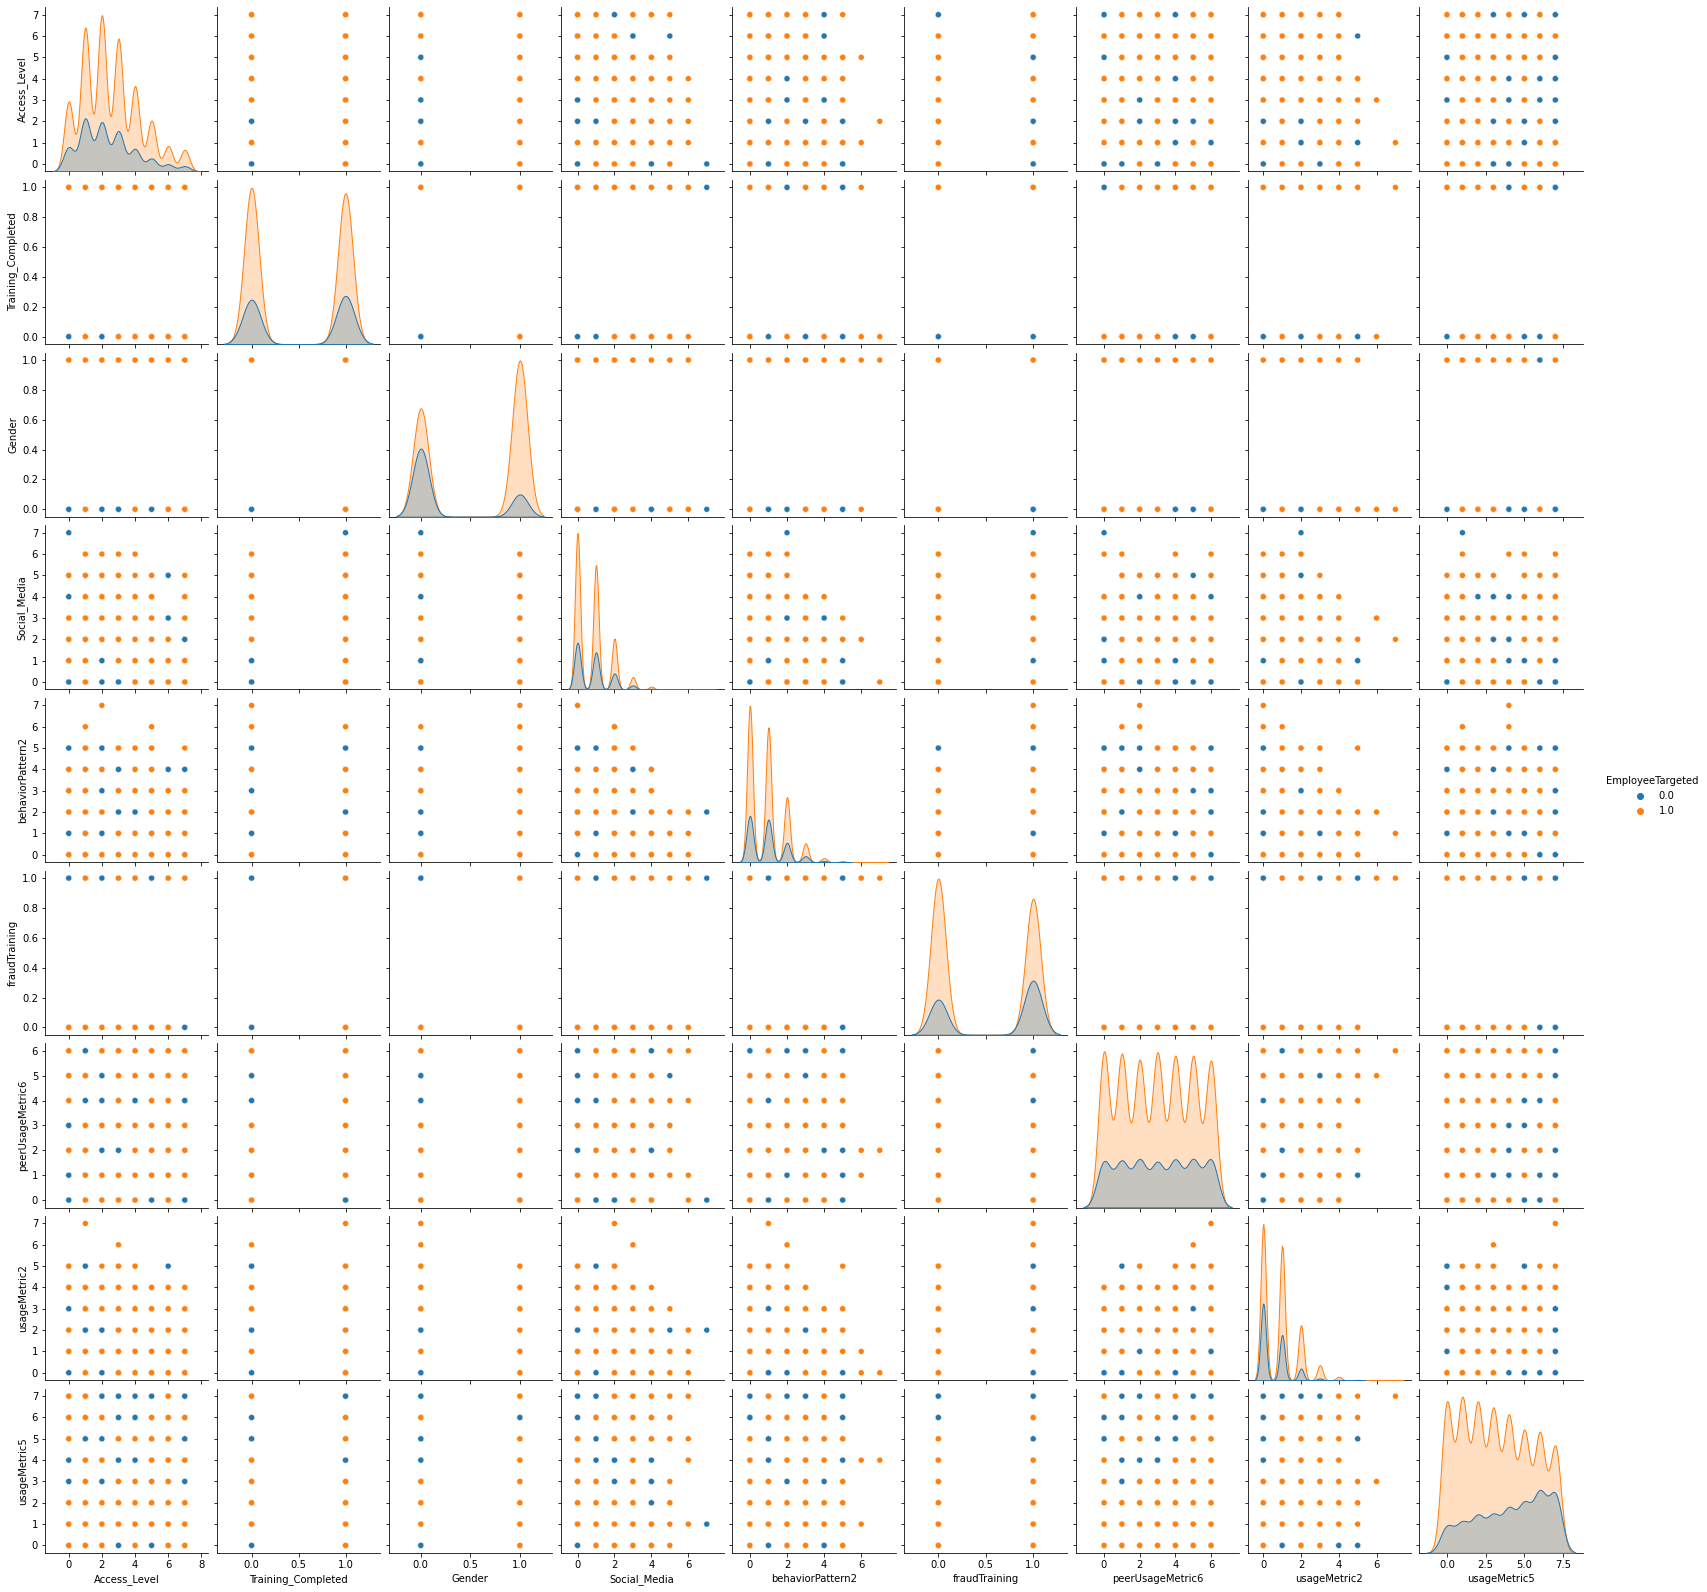

In [44]:
data_num = data.drop("Code_postal", axis=1)
sns.pairplot(data_num, hue="EmployeeTargeted")
# the data seems being distinguishable accord the catagory for the most part of variables 

In [82]:
'''
Conclusion for the data preparation 

-to do missing data replacement
-to do departement, in caractere to avoid numeric division 
-deal with outlier in 'usageMetric2', 'behaviorPattern2'
-email domain to group  + uk (0/1)
-need to group Access_Level
-need to group category Social_Media
-need to group category behaviorPattern2
-data engineering by combinaison of variables
-one hot encoding 
'''

"\nConclusion for the data preparation \n\n-to do missing data replacement\n-to do departement, regions\n-deal with outlier in 'usageMetric2', 'behaviorPattern2'\n-email domain to group\n-need to group Access_Level\n-need to group category Social_Media\n-need to group category behaviorPattern2\n-data engineering by combinaison of variables\n-one hot encoding \n"

### 2) DATA PREPROCESSING - DECISION OF TRAITMENT ON TRAIN DATASET

In [252]:
# I take the future traitement decision based on the train only to get at the end reel score and keep separately unknow data

# Stratify class in order to keep the equality 0/1 on fraudTraining
X_train, X_test, y_train, y_test = train_test_split(data.drop(['fraudTraining'],axis=1), data['fraudTraining'],
                                                    test_size=0.25, random_state=0, stratify=data['fraudTraining'])

y_train.value_counts(normalize = True)

1    0.503333
0    0.496667
Name: fraudTraining, dtype: float64

In [253]:
y_test.value_counts(normalize = True)

1    0.503143
0    0.496857
Name: fraudTraining, dtype: float64

In [213]:
processing_data = pd.concat([X_train,y_train], axis = 1)
processing_data.shape

(10500, 12)

##### STEP1 : missing data replacement

In [106]:
processing_data.columns[data.isnull().any()]

Index(['Training_Completed', 'Email_Domain', 'Social_Media'], dtype='object')

In [107]:
pd.crosstab(processing_data['Training_Completed'],processing_data['EmployeeTargeted'],normalize=True)

EmployeeTargeted,0.0,1.0
Training_Completed,,
0.0,0.127230,0.369601
1.0,0.141269,0.361899


In [114]:
interpolate = processing_data['Training_Completed'].interpolate(method='linear', direction = 'forward').round(0)
pd.crosstab(interpolate,processing_data['EmployeeTargeted'],normalize=True)
# ==> keep the original distribution so okay

EmployeeTargeted,0.0,1.0
Training_Completed,,
0.0,0.128286,0.374381
1.0,0.139429,0.357905


In [157]:
pd.crosstab(processing_data['Email_Domain'],processing_data['EmployeeTargeted'],normalize=True)

EmployeeTargeted,0.0,1.0
Email_Domain,,
ehow.com,0.016892,0.065916
google.co.uk,0.012038,0.064557
nsw.gov.au,0.009417,0.041744
ox.ac.uk,0.037763,0.107659
si.edu,0.127075,0.276381
slideshare.net,0.064460,0.176099


In [158]:
value_nan_Email_Domain = processing_data['Email_Domain'].value_counts().idxmax()
test = processing_data
test['Email_Domain'].replace(to_replace = np.nan, value = value_nan_Email_Domain, inplace=True)
pd.crosstab(test['Email_Domain'],processing_data['EmployeeTargeted'],normalize=True)
# ==> keep the original distribution so okay

EmployeeTargeted,0.0,1.0
Email_Domain,,
ehow.com,0.016571,0.064667
google.co.uk,0.011810,0.063333
nsw.gov.au,0.009238,0.040952
ox.ac.uk,0.037048,0.105619
si.edu,0.129810,0.284952
slideshare.net,0.063238,0.172762


In [149]:
processing_data['Social_Media']

,Access_Level,Training_Completed,Code_postal,Email_Domain,EmployeeTargeted,Gender,Social_Media,behaviorPattern2,peerUsageMetric6,usageMetric2,usageMetric5,fraudTraining
3402,4,1.0,10000,slideshare.net,1.0,0,2.0,1,6,0,4,1
2817,2,1.0,84995,slideshare.net,0.0,0,1.0,0,5,1,6,1
3692,2,1.0,10000,ox.ac.uk,1.0,0,0.0,0,0,0,4,1
4229,3,0.0,24999,si.edu,1.0,1,0.0,2,6,0,6,0
11179,2,1.0,24999,si.edu,1.0,1,1.0,2,3,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10005,5,1.0,24999,ox.ac.uk,1.0,1,0.0,1,5,3,5,0
9789,1,1.0,10000,si.edu,1.0,1,1.0,0,2,0,3,0
6652,1,0.0,24999,si.edu,1.0,1,1.0,0,5,1,2,0
5414,3,0.0,24999,slideshare.net,1.0,0,2.0,0,6,1,3,1


In [159]:
pd.crosstab(processing_data['Social_Media'],processing_data['EmployeeTargeted'],normalize=True)

EmployeeTargeted,0.0,1.0
Social_Media,,
0.0,0.120772,0.326936
1.0,0.096540,0.262867
2.0,0.039062,0.106911
3.0,0.010177,0.027721
4.0,0.001939,0.005913
5.0,0.000291,0.000582
6.0,0.000000,0.000291


In [161]:
interpolate = processing_data['Social_Media'].interpolate(method='linear', direction = 'forward').round(0)
pd.crosstab(interpolate,processing_data['EmployeeTargeted'],normalize=True)
# good interpolatin

EmployeeTargeted,0.0,1.0
Social_Media,,
0.0,0.120095,0.328476
1.0,0.096000,0.261619
2.0,0.039429,0.108190
3.0,0.010000,0.027333
4.0,0.001905,0.005810
5.0,0.000286,0.000571
6.0,0.000000,0.000286


##### STEP 2) departement, regions

In [178]:
# Pbl : we don't know if it's french cities and so I can't replace by the INSEE database
# keep in caracter to avoid hierachy level between code_postal
processing_data['Dpt'] = processing_data['Code_postal'].astype('str').str[0:2]
processing_data['Dpt'].value_counts()
del processing_data['Code_postal']

##### STEP 3) deal with outlier in 'usageMetric2', 'behaviorPattern2'

In [190]:
processing_data['usageMetric2'].value_counts(normalize=True)
pd.crosstab(processing_data['usageMetric2'],processing_data['EmployeeTargeted'],normalize=True)

EmployeeTargeted,0.0,1.0
usageMetric2,,
0,0.150095,0.315333
1,0.089429,0.266762
2,0.023619,0.111524
3,0.003714,0.030476
4,0.000667,0.007238
5,0.000190,0.000762
6,0.000000,0.000095
7,0.000000,0.000095


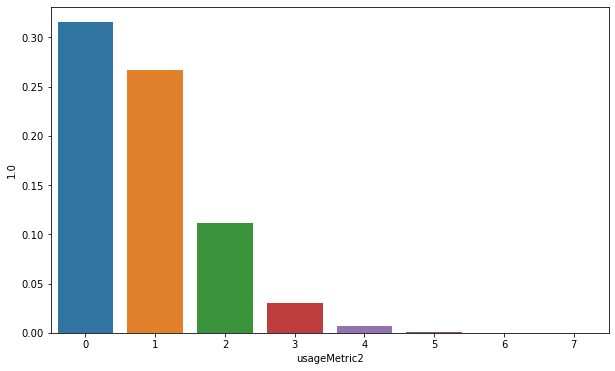

In [207]:
df = pd.crosstab(processing_data['usageMetric2'],processing_data['EmployeeTargeted'],normalize=True).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x="usageMetric2",y=1.0, data=df)
plt.show()

# usageMetric2 = grouping of 4,5,6,7 together

In [192]:
processing_data['behaviorPattern2'].value_counts(normalize=True)
pd.crosstab(processing_data['behaviorPattern2'],processing_data['EmployeeTargeted'],normalize=True)
# behaviorPattern2 = grouping of 4,5,6,7 together

EmployeeTargeted,0.0,1.0
behaviorPattern2,,
0,0.107048,0.302381
1,0.099048,0.258857
2,0.044667,0.125048
3,0.013143,0.036095
4,0.002762,0.007714
5,0.001048,0.001905
6,0.000000,0.000190
7,0.000000,0.000095


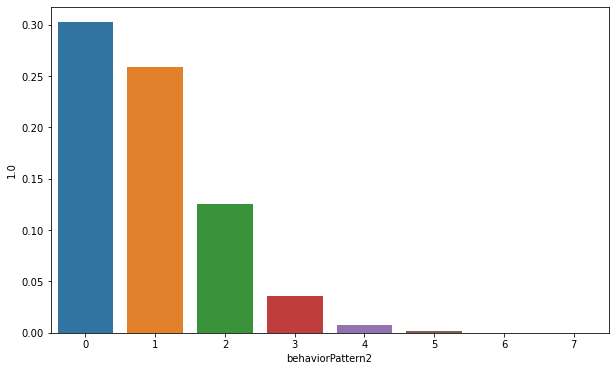

In [208]:
df = pd.crosstab(processing_data['behaviorPattern2'],processing_data['EmployeeTargeted'],normalize=True).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x="behaviorPattern2",y=1.0, data=df)
plt.show()

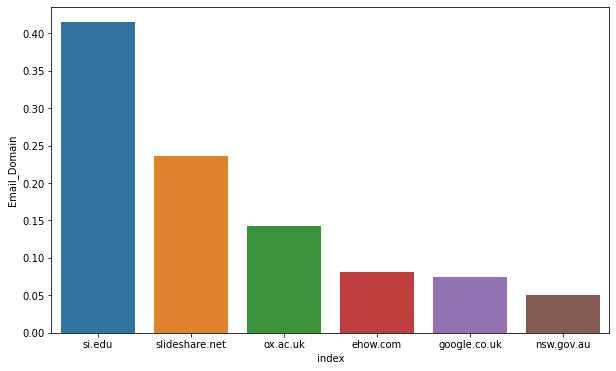

In [209]:
df = processing_data['Email_Domain'].value_counts(normalize=True).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x="index",y="Email_Domain", data=df)
plt.show()

EmployeeTargeted    Email_Domain       0.0       1.0
0                       ehow.com  0.016892  0.065916
1                   google.co.uk  0.012038  0.064557
2                     nsw.gov.au  0.009417  0.041744
3                       ox.ac.uk  0.037763  0.107659
4                         si.edu  0.127075  0.276381
5                 slideshare.net  0.064460  0.176099


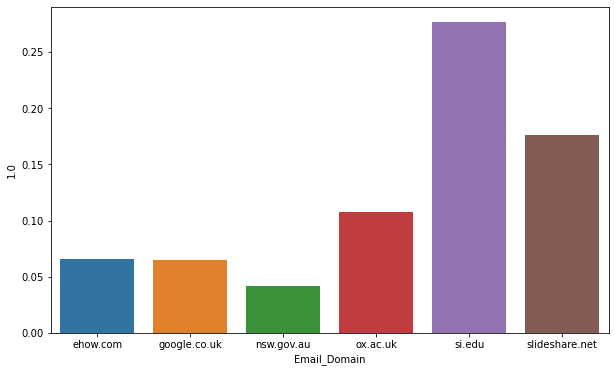

si.edu            4156
slideshare.net    2478
others            2169
ox.ac.uk          1498
Name: Email_Domain, dtype: int64

In [257]:
# group for Email 
df = pd.crosstab(processing_data['Email_Domain'],processing_data['EmployeeTargeted'],normalize=True).reset_index()
print(df)
plt.figure(figsize=(10, 6))
sns.barplot(x="Email_Domain",y=1.0, data=df)
plt.show()

dic_email = {"ehow.com": "others", "google.co.uk":"others","nsw.gov.au":"others"}
processing_data['Email_Domain'].replace(dic_email).value_counts()
#==> Seems to be discrimant - one hot enconding with this variable 

In [259]:
processing_data['Email_Domain'].value_counts(normalize=True)

si.edu            0.403456
slideshare.net    0.240559
ox.ac.uk          0.145423
ehow.com          0.082807
google.co.uk      0.076595
nsw.gov.au        0.051160
Name: Email_Domain, dtype: float64

In [215]:
 # One Hot encoding for the Email_Domain
encoded_columns = pd.get_dummies(processing_data['Email_Domain'])
processing_data = processing_data.join(encoded_columns)
processing_data

,Access_Level,Training_Completed,Code_postal,Email_Domain,EmployeeTargeted,Gender,Social_Media,behaviorPattern2,peerUsageMetric6,usageMetric2,usageMetric5,fraudTraining,ehow.com,google.co.uk,nsw.gov.au,ox.ac.uk,si.edu,slideshare.net
3402,4,1.0,10000,slideshare.net,1.0,0,2.0,1,6,0,4,1,0,0,0,0,0,1
2817,2,1.0,84995,slideshare.net,0.0,0,1.0,0,5,1,6,1,0,0,0,0,0,1
3692,2,1.0,10000,ox.ac.uk,1.0,0,0.0,0,0,0,4,1,0,0,0,1,0,0
4229,3,0.0,24999,si.edu,1.0,1,0.0,2,6,0,6,0,0,0,0,0,1,0
11179,2,1.0,24999,si.edu,1.0,1,1.0,2,3,1,5,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10005,5,1.0,24999,ox.ac.uk,1.0,1,0.0,1,5,3,5,0,0,0,0,1,0,0
9789,1,1.0,10000,si.edu,1.0,1,1.0,0,2,0,3,0,0,0,0,0,1,0
6652,1,0.0,24999,si.edu,1.0,1,1.0,0,5,1,2,0,0,0,0,0,1,0
5414,3,0.0,24999,slideshare.net,1.0,0,2.0,0,6,1,3,1,0,0,0,0,0,1


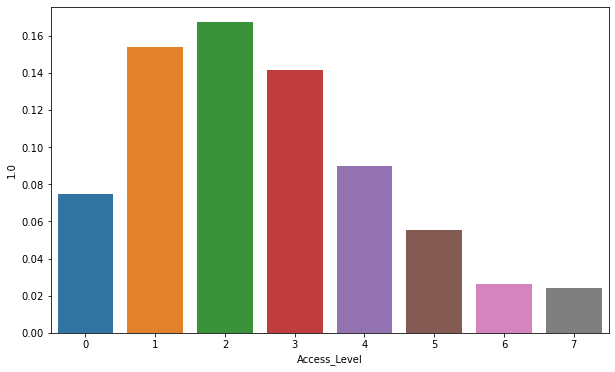

2    2387
1    2309
3    2001
4    1252
0    1114
5     757
6     362
7     318
Name: Access_Level, dtype: int64

In [217]:
# group for Access_Level 
df = pd.crosstab(processing_data['Access_Level'],processing_data['EmployeeTargeted'],normalize=True).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x="Access_Level",y=1.0, data=df)
plt.show()

processing_data['Access_Level'].value_counts()
# Access_Level group 6 & 7 => same comportement 

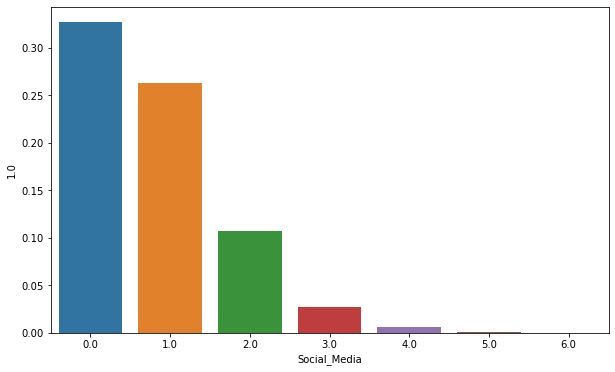

0.0    4619
1.0    3708
2.0    1506
3.0     391
4.0      81
5.0       9
6.0       3
Name: Social_Media, dtype: int64

In [218]:
# group for Social_Media 
df = pd.crosstab(processing_data['Social_Media'],processing_data['EmployeeTargeted'],normalize=True).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x="Social_Media",y=1.0, data=df)
plt.show()

processing_data['Social_Media'].value_counts()
# Social_Media 3 , 4, 5, 6 

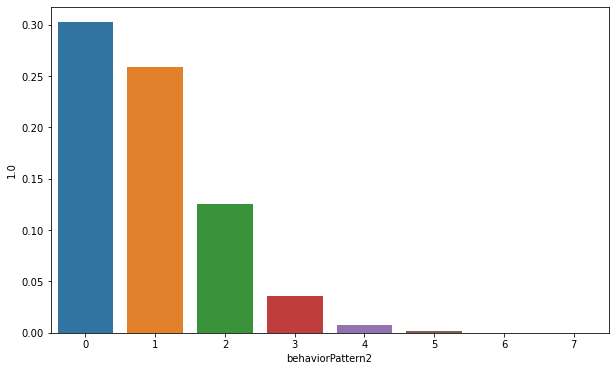

0    4299
1    3758
2    1782
3     517
4     110
5      31
6       2
7       1
Name: behaviorPattern2, dtype: int64

In [219]:
# group for behaviorPattern2 
df = pd.crosstab(processing_data['behaviorPattern2'],processing_data['EmployeeTargeted'],normalize=True).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x="behaviorPattern2",y=1.0, data=df)
plt.show()

processing_data['behaviorPattern2'].value_counts()
# behaviorPattern2 3 , 4, 5, 6 

In [ ]:
# to do : processing
# dictionnaire 

######> missing data
# processing_data['Training_Completed'].interpolate(method='linear', direction = 'forward').round(0)
# test['Email_Domain'].replace(to_replace = np.nan, value = value_nan_Email_Domain, inplace=True) + store value_nan_Email_Domain
#interpolate = processing_data['Social_Media'].interpolate(method='linear', direction = 'forward').round(0)

######> Code postal
#processing_data['Dpt'] = processing_data['Code_postal'].astype('str').str[0:2]
#del processing_data['Code_postal']

######> # usageMetric2 = grouping of 4,5,6,7 together
######> # behaviorPattern2 = grouping of 4,5,6,7 together


######> EMAIL
# dictionnaire replacement
#dic_email = {"ehow.com": "others", "google.co.uk":"others","nsw.gov.au":"others"}
#processing_data['Email_Domain'].replace(dic_email).value_counts()
 # and One Hot encoding 
#encoded_columns = pd.get_dummies(processing_data['Email_Domain'])
#processing_data = processing_data.join(encoded_columns)

######> GROUPING
# Access_Level group 6 & 7 => same comportement 
# # Social_Media 3 , 4, 5, 6 
# behaviorPattern2 3 , 4, 5, 6 


In [222]:
# To keep the same data division in the modeling part 
pd.concat([X_train,y_train], axis = 1).to_csv('data/sub_dataset/train_dataset.csv')
pd.concat([X_test,y_test], axis = 1).to_csv('data/sub_dataset/test_dataset.csv')